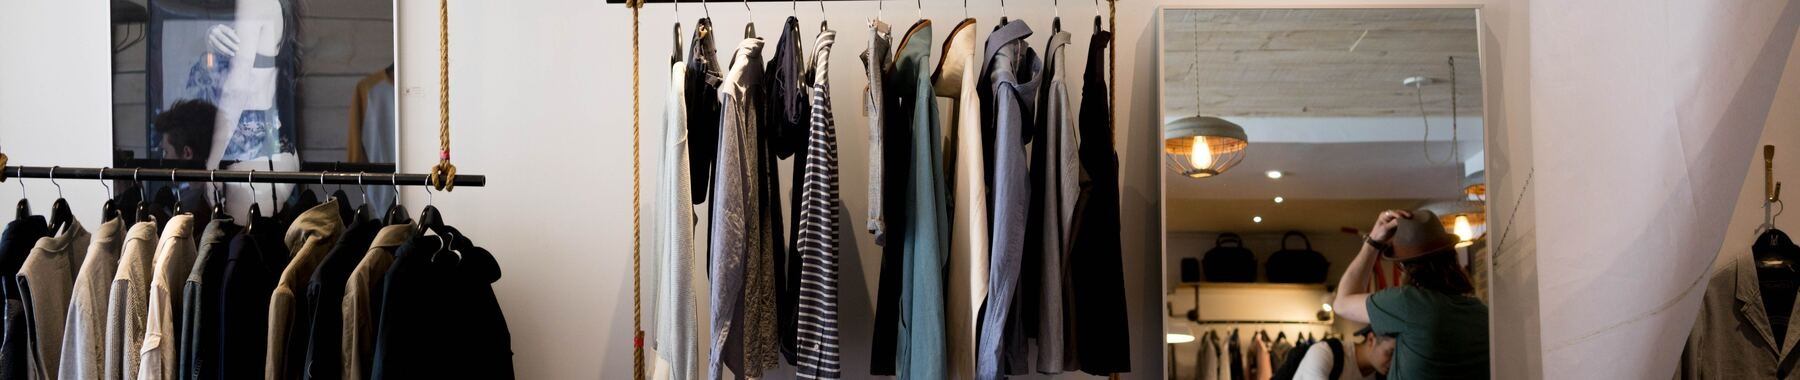
## About Dataset:

*The dataset can be publicly acccessible from Kaggle @ 'https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website'*<br>

The dataset is having data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying *to decide whether to focus their efforts on their `mobile app` experience or their `website`*.

## Importing & Exploring data

In [ ]:
# Importing essential libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('ecommerce.csv')

In [ ]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### EDA

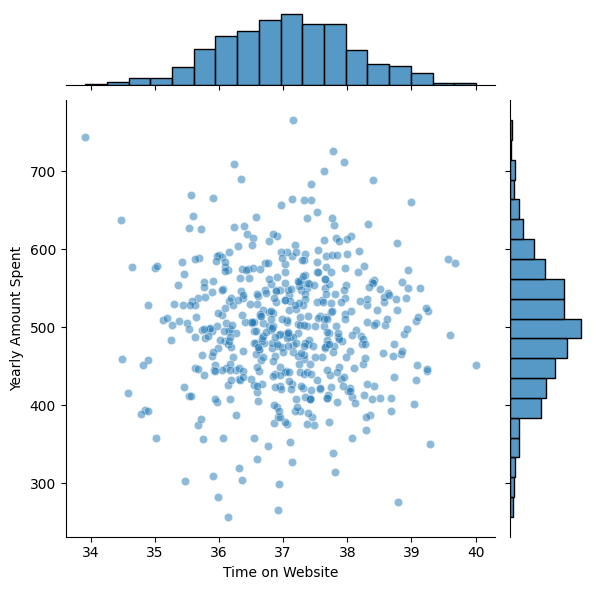

In [ ]:
# Time on Website vs. Yearly amount spent

sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df, alpha=0.5)

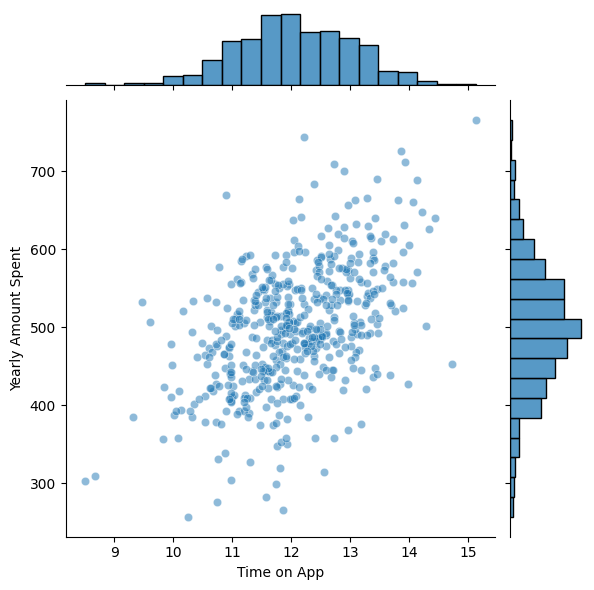

In [ ]:
# Time on App vs. Yearly amount spent

sns.jointplot(x='Time on App', y = 'Yearly Amount Spent', alpha=0.5, data=df)

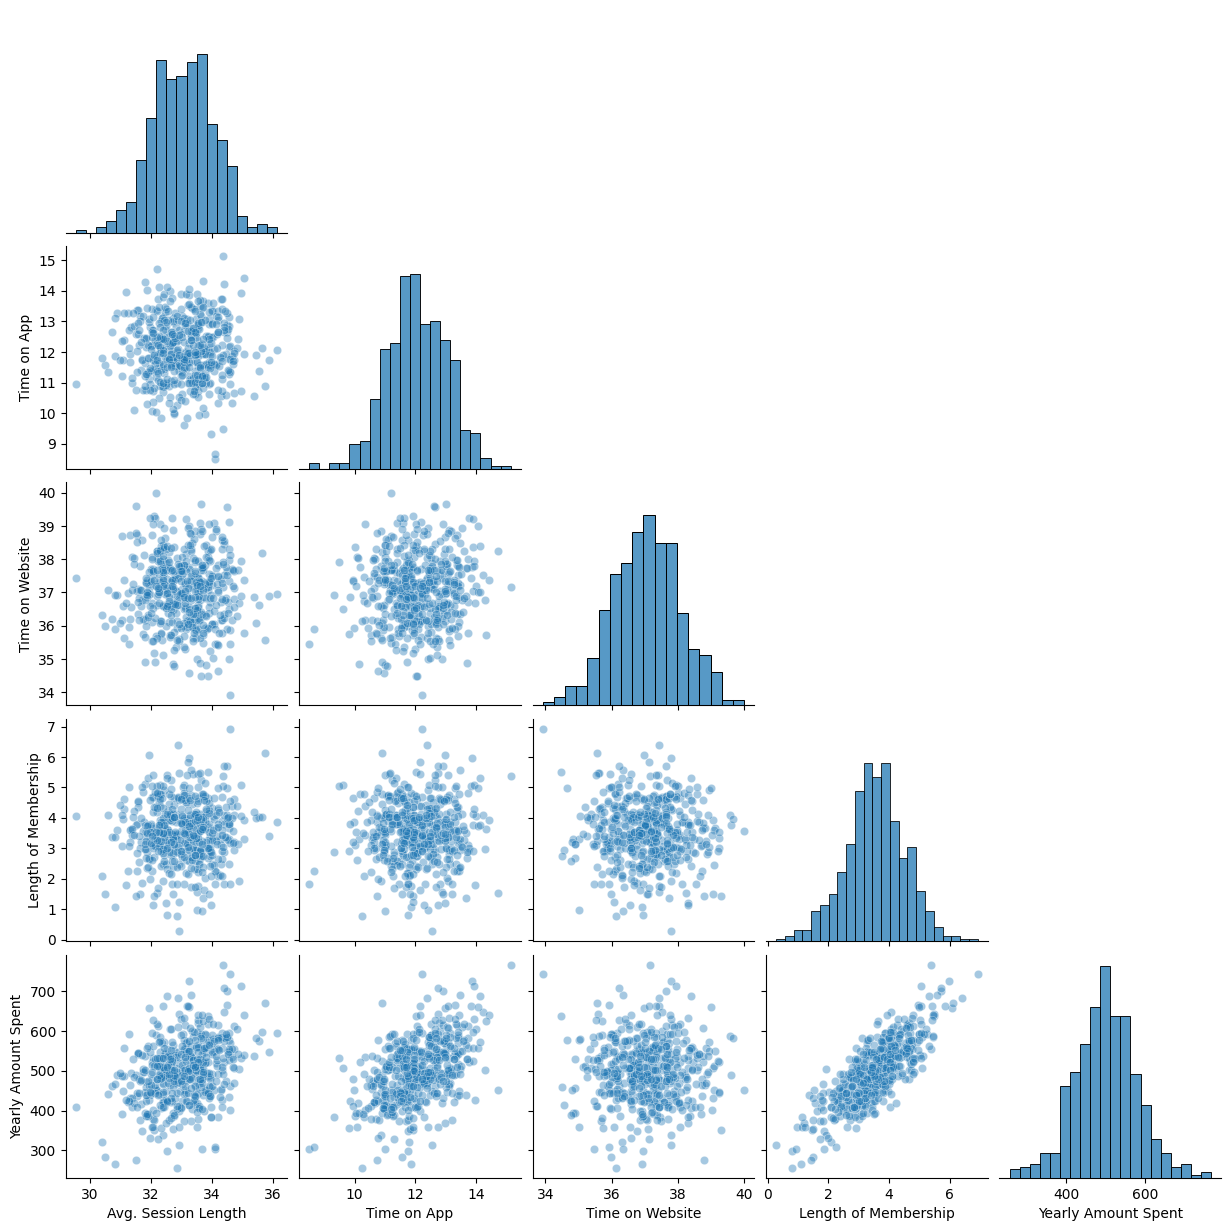

In [ ]:
# Pair plot to visually see the relationship between various numeric variables in the data

sns.pairplot(df, plot_kws={'alpha':0.4}, corner=True)

**Conclusion from Pairplot:**

The pairplot visualization reveals several relationships between the numerical features:

*   **Length of Membership** appears to have the strongest linear relationship with **Yearly Amount Spent**. This is evident from the clear upward trend in the scatter plot between these two variables.
*   **Time on App** also shows a positive correlation with **Yearly Amount Spent**, though perhaps not as strong as Length of Membership.
*   **Avg. Session Length** and **Time on Website** show weaker linear relationships with **Yearly Amount Spent**. The scatter plots for these pairs appear more dispersed.
*   Among the independent variables, there are some visible correlations, but none appear to be strongly multicollinear, which is good for a linear regression model.

Overall, the pairplot reinforces the idea that **Length of Membership** and **Time on App** are likely significant predictors of **Yearly Amount Spent**.

Text(0.5, 1.0, 'Length of Membership vs. Yearly Amount Spent')

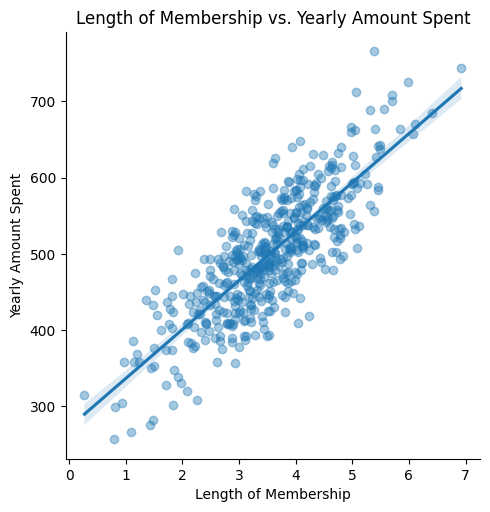

In [ ]:
sns.lmplot(x='Length of Membership',
           y='Yearly Amount Spent',
           data=df,
           scatter_kws={'alpha':0.4})
plt.title("Length of Membership vs. Yearly Amount Spent")

## Model training

In [ ]:
# Assigning DataFrame to feature & target variables for ML model ingestion

X = df[['Avg. Session Length',
        'Time on App',                # Assigning only numeric variables from the DataFrame as feature since categorical variables are redundant
        'Time on Website',
        'Length of Membership']]

y = df['Yearly Amount Spent']

In [ ]:
# Splitting the data to training & testing dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Training the model
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Checking the importance of each of the features from the trained model

wm = pd.DataFrame(lm.coef_, X.columns, columns=['Weights/Coefficients'])
print(wm)
print('\n')

# Checking the intercept from the trained model
print('Bias/Intercept:', lm.intercept_)

                      Weights/Coefficients
Avg. Session Length              25.724256
Time on App                      38.597135
Time on Website                   0.459148
Length of Membership             61.674732


Bias/Intercept: -1050.6536746645725


In [ ]:
# Storing predictions from the linear model on the test dataset
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Linear Regression output vs. Actual test values')

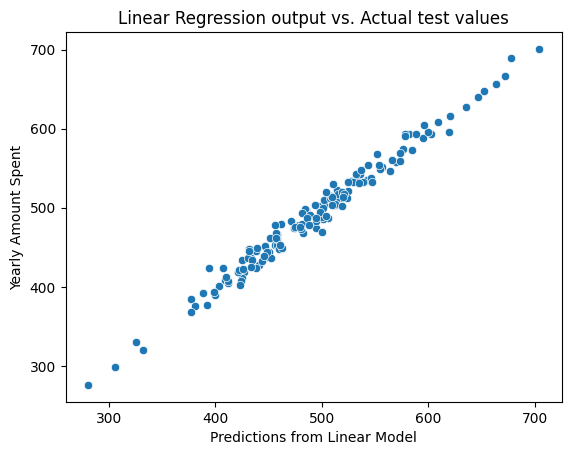

In [ ]:
# Comparison of Linear model output with the actual test values

sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions from Linear Model")
plt.title("Linear Regression output vs. Actual test values")

## Model evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math

In [ ]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))
print('R2 Score:',r2_score(y_test, predictions))

Mean Absolute Error: 8.426091641432116
Mean Squared Error: 103.91554136503333
Root Mean Squared Error: 10.193897260863155
R2 Score: 0.9808757641125855


## Residual Analysis

***Residual analysis*** is the practice of plotting and examining the residuals from the fitted linear regression line to check if the assumptions of linear regression model are met. If the assumptions are violated, the model's predictions and conclusions may not be reliable

The Four Key Assumptions of Linear Regression (LINE):
1. **Linearity**: <br>
This assumption states that the relationship between the predictor variable (X) and the outcome variable (Y) is, in fact, linear.

**What to look for:** In a residual plot (residuals vs. fitted values), we want to see the points scattered randomly around the horizontal line at zero. There should be no obvious pattern.

**Violation:** If you see a curve (like a U-shape or an inverted U), it suggests the relationship is not linear, and a simple straight line is not the best fit for the data

2. **Independence:** <br>
This assumes that the residuals (or errors) are independent of each other.

**What to look for:** This is primarily a concern with time-series data. In a residual plot, there should be no "clumping" of residuals or clear trends over time. The errors should be random and not influence each other.

**Violation:** If you see a pattern where, for example, positive errors are consistently followed by more positive errors, it suggests a correlation between them (autocorrelation).

3. **Normality:** <br>
This assumption requires that the residuals follow a normal distribution.

**What to look for:** We check this using a Q-Q Plot (Quantile-Quantile plot) or a histogram of the residuals. In a Q-Q plot, the points should fall roughly along a straight diagonal line. In a histogram, the shape should be approximately a bell curve.

**Violation:** If the points on the Q-Q plot deviate significantly from the straight line, the normality assumption is violated.

4. **Equal Variance (Homoscedasticity):** <br>
This means that the residuals have constant variance at every level of the predictor variable (X).

**What to look for:** In the residual plot (residuals vs. fitted values), the points should be scattered randomly in a band of roughly constant width around the zero line.

**Violation (Heteroscedasticity):** If the plot shows a cone or fan shape, where the spread of residuals increases or decreases as the fitted values change, the assumption is violated.

In [ ]:
residuals = y_test - predictions
residuals = residuals.values

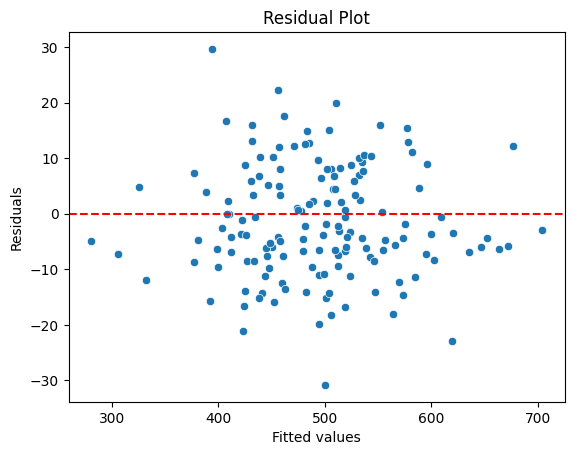

In [ ]:
# Create a scatter plot of residuals against the fitted values
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--') # Add a horizontal line at y=0
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**Conclusion from Residual Plot:**

The residual plot shows that the residuals are randomly scattered around the horizontal line at zero. There is no apparent pattern (such as a curve or a cone shape), which indicates that the linearity and homoscedasticity assumptions of the linear regression model are likely met. The residuals also appear to be independent. This supports the conclusion that the linear model is a good fit for this data.

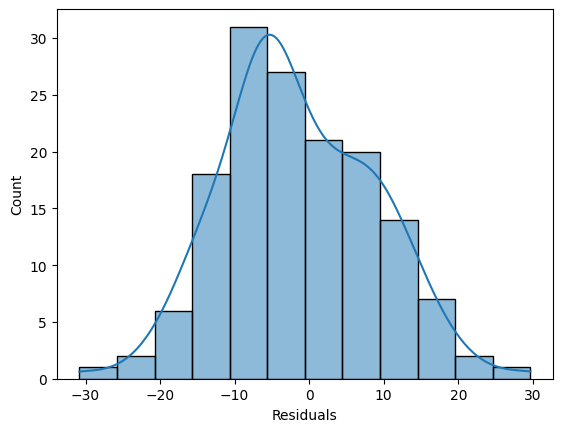

In [ ]:
# Checking normality of the residuals  by a histogram
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.show()

**Conclusion from Residual Histogram:**

The histogram of the residuals appears to be approximately normally distributed, with a peak around zero and a bell-like shape. This visually supports the assumption that the residuals of the linear regression model are normally distributed.

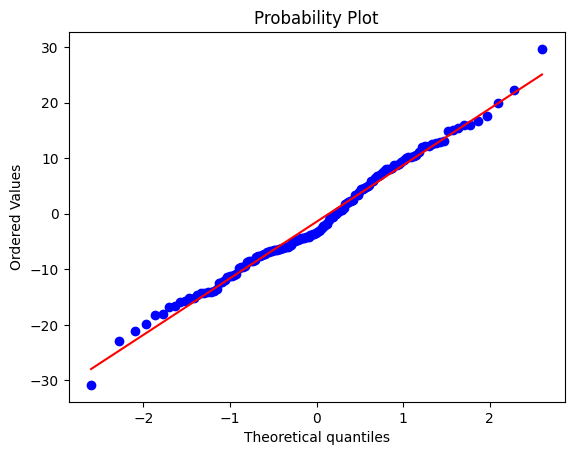

In [ ]:
# Checking Normality of the Residuals through Q-Q plot
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

**Conclusion from Q-Q Plot:**

The Q-Q plot shows that the points generally follow the straight diagonal line. This indicates that the residuals are approximately normally distributed, which is one of the assumptions of linear regression. The slight deviations at the tails might suggest some minor departures from perfect normality, but overall, the assumption appears reasonably met for this model.

## Conclusion

Based on the analysis, the linear regression model shows that:

* **Length of Membership** has the strongest positive correlation with **Yearly Amount Spent**.
* **Time on App** also has a positive correlation with **Yearly Amount Spent**, and its coefficient is higher than 'Avg. Session Length' and 'Time on Website'.
* **Time on Website** has a very weak positive correlation with **Yearly Amount Spent**.
* **Avg. Session Length** has a positive correlation with **Yearly Amount Spent**, but less than 'Length of Membership' and 'Time on App'.

The model evaluation metrics (MAE, MSE, RMSE, and R2 Score) indicate that the model is a good fit for the data. The residual analysis also supports this conclusion, as the residuals are randomly distributed around zero.

**Recommendation:**

Given that **Time on App** has a higher coefficient than **Time on Website** in predicting **Yearly Amount Spent**, the company should focus more on improving the **mobile app experience**. This is because for every unit increase in time spent on the app, the yearly amount spent increases significantly more compared to the time spent on the website.

However, it's also important to consider the **Length of Membership**, as it has the strongest correlation with yearly spending. Investing in strategies to increase customer loyalty and retention could also lead to significant increases in yearly revenue.